In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

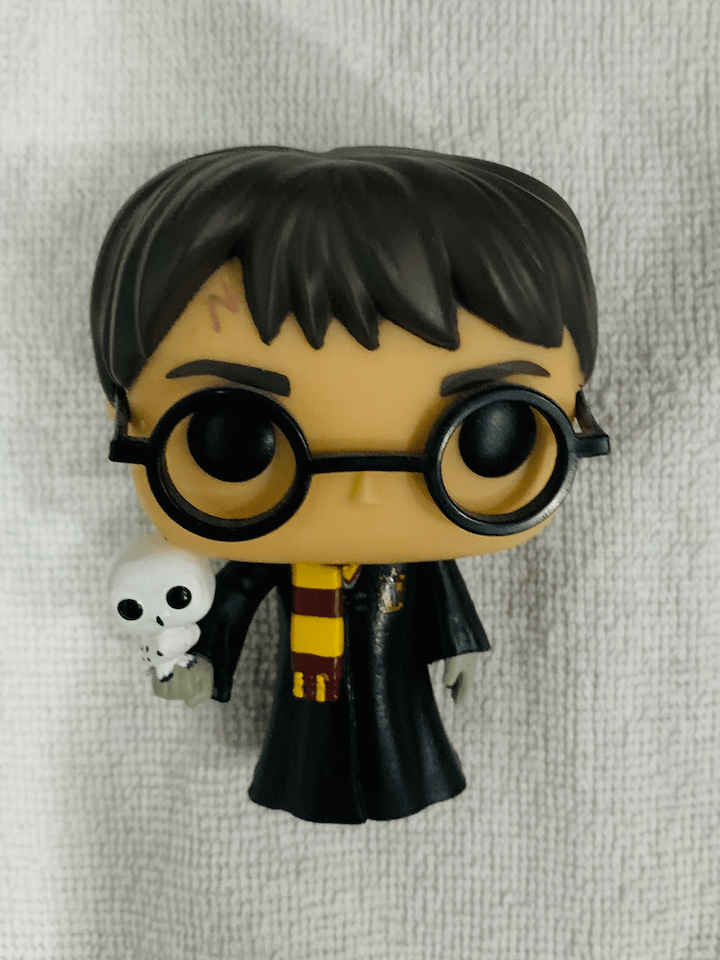

In [20]:
image = cv.imread('/content/drive/My Drive/Dataset/Images/3-min.png')

image_orig = image.copy()

cv2_imshow(image)

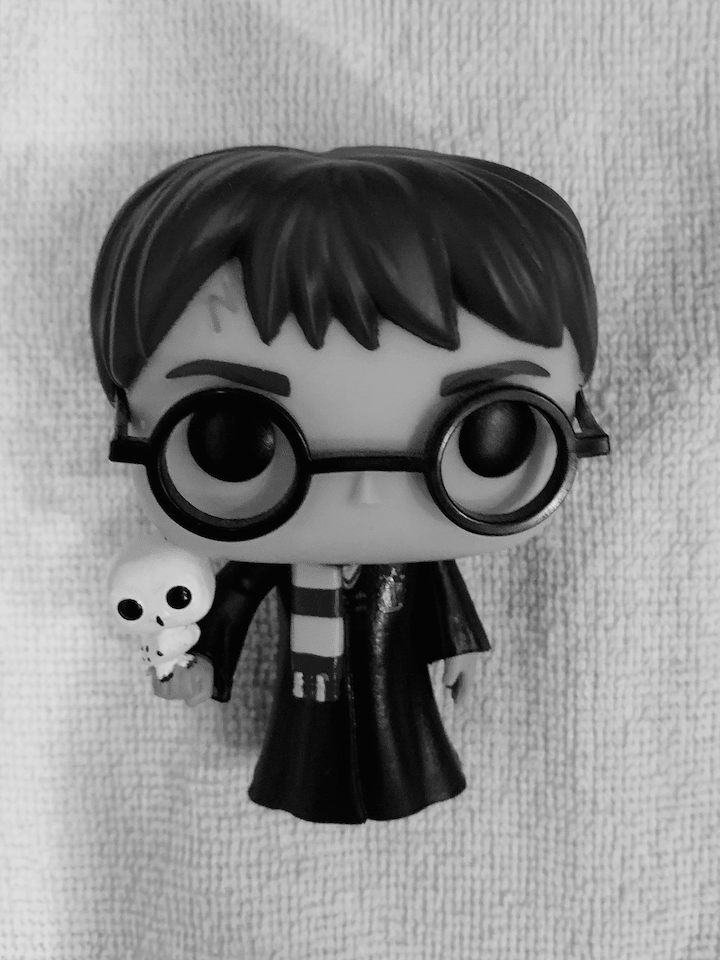

In [3]:
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image)

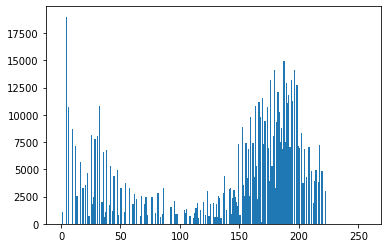

In [4]:
plt.hist(image.flatten(), 256, [0,256])
plt.show()

140.0


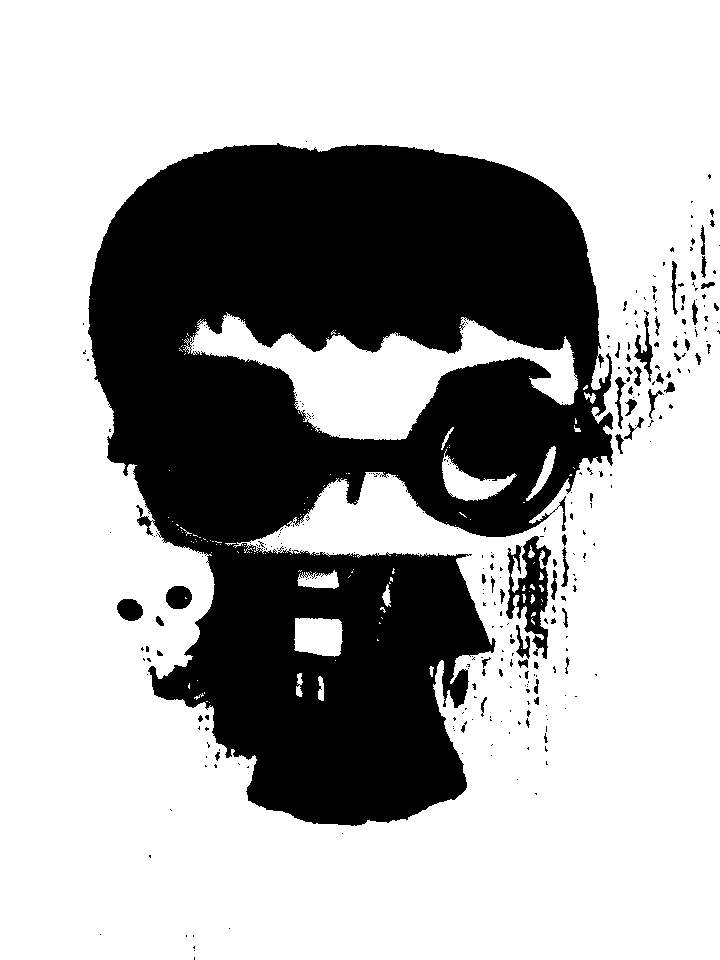

In [7]:
thresholding_value, thresholding_result = cv.threshold(image, 140, 255, cv.THRESH_BINARY)
print(thresholding_value)
cv2_imshow(thresholding_result)

In [8]:
thresholding_result = cv.bitwise_not(thresholding_result)

contours, hierarchy = cv.findContours(thresholding_result, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

print(contours)

[array([[[194, 957]],

       [[194, 959]]], dtype=int32), array([[[194, 950]]], dtype=int32), array([[[194, 946]],

       [[193, 947]],

       [[194, 948]]], dtype=int32), array([[[193, 935]],

       [[193, 936]]], dtype=int32), array([[[186, 935]],

       [[186, 936]]], dtype=int32), array([[[100, 934]]], dtype=int32), array([[[229, 928]]], dtype=int32), array([[[149, 855]],

       [[149, 856]],

       [[150, 857]],

       [[150, 855]]], dtype=int32), array([[[342, 833]]], dtype=int32), array([[[170, 809]],

       [[171, 810]]], dtype=int32), array([[[535, 793]],

       [[536, 794]],

       [[536, 793]]], dtype=int32), array([[[517, 779]]], dtype=int32), array([[[248, 766]],

       [[247, 767]],

       [[248, 767]]], dtype=int32), array([[[205, 765]],

       [[205, 766]],

       [[206, 766]]], dtype=int32), array([[[215, 764]],

       [[214, 765]],

       [[215, 766]],

       [[215, 767]],

       [[216, 767]],

       [[216, 765]]], dtype=int32), array([[[238, 763]]

In [9]:
len(contours)

282

In [10]:
contours[0]

array([[[194, 957]],

       [[194, 959]]], dtype=int32)

In [11]:
#FeatureExtraxtion Contours
area = cv.contourArea(contours[0])

area

0.0

In [12]:
x, y, w, h = cv.boundingRect(contours[0])

print(x, y, w, h)

194 957 1 3


In [13]:
for index, contour in enumerate(contours):
  x, y, w, h = cv.boundingRect(contour)
  area = cv.contourArea(contour)

  print("Contour #" + str(index), x, y, w, h, area)


Contour #0 194 957 1 3 0.0
Contour #1 194 950 1 1 0.0
Contour #2 193 946 2 3 1.0
Contour #3 193 935 1 2 0.0
Contour #4 186 935 1 2 0.0
Contour #5 100 934 1 1 0.0
Contour #6 229 928 1 1 0.0
Contour #7 149 855 2 3 1.5
Contour #8 342 833 1 1 0.0
Contour #9 170 809 2 2 0.0
Contour #10 535 793 2 2 0.5
Contour #11 517 779 1 1 0.0
Contour #12 247 766 2 2 0.5
Contour #13 205 765 2 2 0.5
Contour #14 214 764 3 4 3.5
Contour #15 238 763 2 2 0.0
Contour #16 546 761 2 4 0.5
Contour #17 206 756 1 2 0.0
Contour #18 491 755 1 1 0.0
Contour #19 462 753 1 1 0.0
Contour #20 215 752 5 9 18.0
Contour #21 219 749 1 2 0.0
Contour #22 527 747 2 3 1.0
Contour #23 545 746 3 6 3.0
Contour #24 491 744 2 2 0.0
Contour #25 207 742 3 6 2.0
Contour #26 544 733 4 10 9.5
Contour #27 509 732 1 2 0.0
Contour #28 454 730 1 1 0.0
Contour #29 453 728 1 1 0.0
Contour #30 205 727 4 4 5.0
Contour #31 546 726 1 6 0.0
Contour #32 453 726 1 1 0.0
Contour #33 198 726 2 4 1.0
Contour #34 518 721 3 4 3.0
Contour #35 501 721 1 1 0.0


Object-1


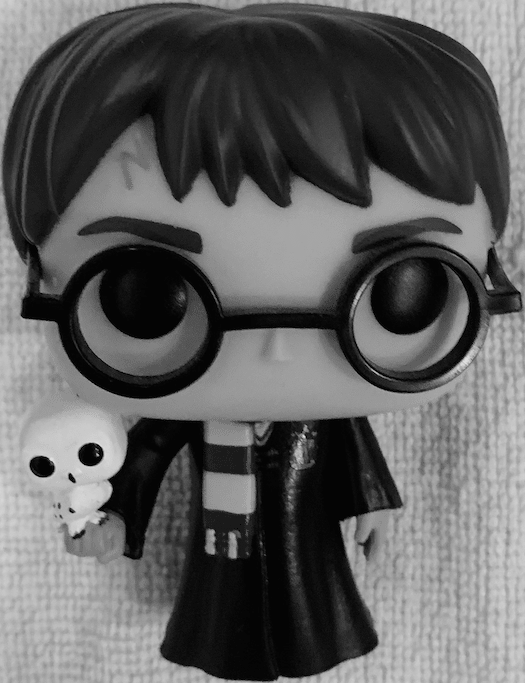

In [15]:
x, y, w, h = cv.boundingRect(contours[280])
harry = image[y:y+h, x:x+w]
print('Object-1')
cv2_imshow(harry)

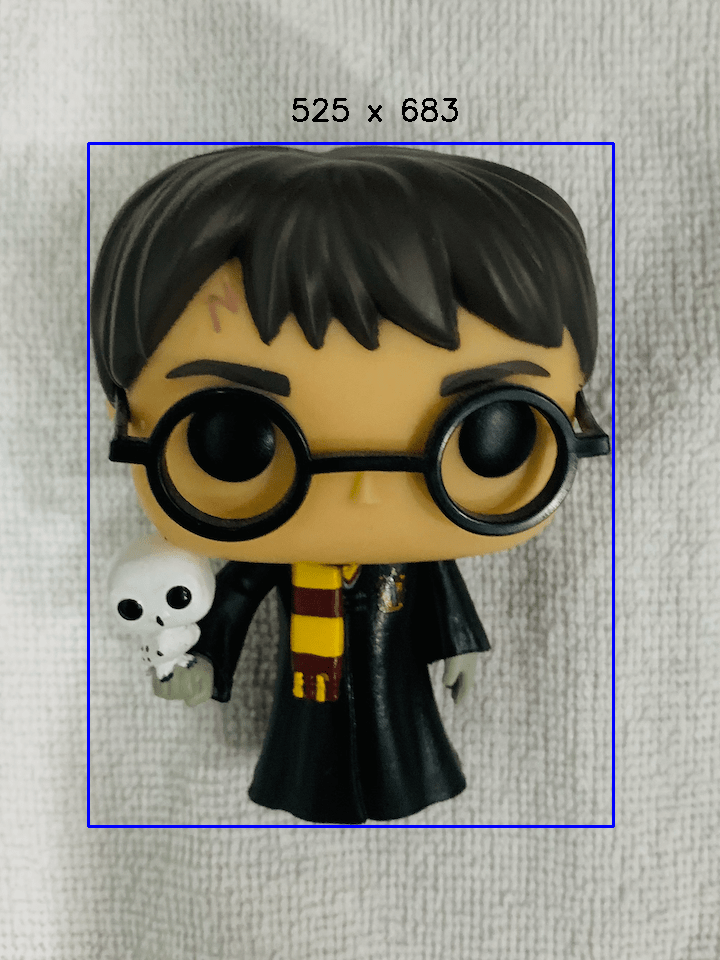

In [21]:

cv.rectangle(image_orig, (x,y), (x+w,y+h), (255,0,0), 2)
font = cv.FONT_HERSHEY_SIMPLEX
bottomRightCornerOfText = (290,120)
fontScale = 1
fontColor = (0,0,0)
lineType = 2
text = str(w) + ' x ' + str(h)
cv.putText(image_orig, text, bottomRightCornerOfText, font, fontScale, fontColor, lineType)
cv2_imshow(image_orig)


Proses preprosesing sebelum ekstraksi contour : Gambar diubah menjadi abu-abu menggunakan grayscale. Filtering pada gambar menggunakan median filtering. Kemudian dilakukan Global thresholding agar gambar berwarna hitam putih sehingga mudah melihat mana yang background mana yang objek. Dikarenakan background berwarna putih, maka diperlukan fungsi bitwise karena program membaca background hanya berwarna hitam. Dari hasil thresholding didapatkan contournya.

